In [48]:
import pandas as pd
import numpy as np

In [49]:
#  파일을 로드
df = pd.read_csv('/Users/hayden/Desktop/provincial council internship/2023년전체측정소자료수정.csv', encoding='cp949')


여기서 전체 데이터프레임의 NULL 값 개수: 16027은 datetime은 00~23인데 24를 넣어놔서 24들이 만듦. 24-> 00으로 수정해야 함

In [50]:
# int64 'MSR_DT' -> datetime. but there's so many NaT Error occured.
# the reasoned found: datetime data gotta be 00~23. but writer put 24. so all the 24:00 data became NaT
df['MSR_DT'] = df['MSR_DT'].astype(str)
df['MSR_DT'] = pd.to_datetime(df['MSR_DT'], format='%Y%m%d%H', errors='coerce')

In [51]:
# datetime 변환한 다음에 진행해야함
# NaT 값을 가진 행 탐색
nat_rows = df[df['MSR_DT'].isnull()]

# NaT 값을 가진 행들의 인덱스를 리스트로 추출
nat_indices = nat_rows.index.tolist()
print("\nNaT 값을 가진 행들의 인덱스 리스트:")
print(nat_indices)


NaT 값을 가진 행들의 인덱스 리스트:
[23, 47, 71, 95, 119, 143, 167, 191, 215, 239, 263, 287, 311, 335, 359, 383, 407, 431, 455, 479, 503, 527, 551, 575, 599, 623, 647, 671, 695, 719, 743, 767, 791, 815, 839, 863, 887, 911, 935, 959, 983, 1007, 1031, 1055, 1079, 1103, 1127, 1151, 1175, 1199, 1223, 1247, 1271, 1295, 1319, 1343, 1367, 1391, 1415, 1439, 1463, 1487, 1511, 1535, 1559, 1583, 1607, 1631, 1655, 1679, 1703, 1727, 1751, 1775, 1799, 1823, 1847, 1871, 1895, 1919, 1943, 1967, 1991, 2015, 2039, 2063, 2087, 2111, 2135, 2159, 2183, 2207, 2231, 2255, 2279, 2303, 2327, 2351, 2375, 2399, 2423, 2447, 2471, 2495, 2519, 2543, 2567, 2591, 2615, 2639, 2663, 2687, 2711, 2735, 2759, 2783, 2807, 2831, 2855, 2879, 2903, 2927, 2951, 2975, 2999, 3023, 3047, 3071, 3095, 3119, 3143, 3167, 3191, 3215, 3239, 3263, 3287, 3311, 3335, 3359, 3383, 3407, 3431, 3455, 3479, 3503, 3527, 3551, 3575, 3599, 3623, 3647, 3671, 3695, 3719, 3743, 3767, 3791, 3815, 3839, 3863, 3887, 3911, 3935, 3959, 3983, 4007, 4031, 4055, 4079, 

In [52]:
import pandas as pd

df2 = pd.read_csv('/Users/hayden/Desktop/provincial council internship/2023년전체측정소자료수정.csv', encoding='cp949')

In [53]:
# 인덱스에 해당하는 "MSR_DT"의 0, 1의 자리 숫자를 00으로 변환하는 함수  모든 24->00으로 변환
def change_last_two_digits_to_00(df2, indices):
    for index in indices:
        if index in df2.index:
            msr_dt = str(df2.at[index, 'MSR_DT'])
            msr_dt_new = msr_dt[:-2] + '00'
            df2.at[index, 'MSR_DT'] = int(msr_dt_new)
    return df2

# 함수 적용
df2 = change_last_two_digits_to_00(df2, nat_indices)

# 결과 출력
print(df2)

            MSR_DT STTN_NM  PM25  PM10     O3   CO    SO2    NO2
0       2023010101     명서동  18.0  24.0  0.027  0.4  0.003  0.018
1       2023010102     명서동  17.0  23.0  0.025  0.4  0.003  0.019
2       2023010103     명서동  18.0  23.0  0.014  0.5  0.003  0.029
3       2023010104     명서동  20.0  25.0  0.015  0.5  0.003  0.026
4       2023010105     명서동  19.0  24.0  0.010  0.5  0.003  0.032
...            ...     ...   ...   ...    ...  ...    ...    ...
384540  2023123120     마산항   0.0  11.0  0.037  0.4  0.001  0.013
384541  2023123121     마산항  15.0  15.0  0.036  0.4  0.001  0.012
384542  2023123122     마산항   0.0  14.0  0.035  0.4  0.001  0.012
384543  2023123123     마산항   0.0  11.0  0.032  0.4  0.001  0.014
384544  2023123100     마산항   0.0  16.0  0.031  0.4  0.001  0.013

[384545 rows x 8 columns]


In [54]:
# 1. 데이터 확인
print(df2['MSR_DT'].head())
print(df2['MSR_DT'].dtype)

# 2. 형식에 맞지 않는 값 찾기
invalid_format = df2[~df2['MSR_DT'].astype(str).str.match(r'\d{10}')]

print("형식에 맞지 않는 값들:")
print(invalid_format)

print('-'*100)

# 형식에 맞지 않는 값을 수정하거나 삭제
df2 = df2[df2['MSR_DT'].astype(str).str.match(r'\d{10}')]

# 3. 데이터 변환 시도
df2['MSR_DT'] = pd.to_datetime(df2['MSR_DT'].astype(str), format='%Y%m%d%H', errors='coerce')

# 변환 결과 확인

print(df2['MSR_DT'].tail())
print(df2['MSR_DT'].isnull().sum())


0    2023010101
1    2023010102
2    2023010103
3    2023010104
4    2023010105
Name: MSR_DT, dtype: int64
int64
형식에 맞지 않는 값들:
Empty DataFrame
Columns: [MSR_DT, STTN_NM, PM25, PM10, O3, CO, SO2, NO2]
Index: []
----------------------------------------------------------------------------------------------------
384540   2023-12-31 20:00:00
384541   2023-12-31 21:00:00
384542   2023-12-31 22:00:00
384543   2023-12-31 23:00:00
384544   2023-12-31 00:00:00
Name: MSR_DT, dtype: datetime64[ns]
0


In [55]:
# MSR_DT 열에서 NaT의 개수 세기
df_copy=df2.copy()
nat_count = df_copy['MSR_DT'].isnull().sum()

print("MSR_DT 열의 NaT 개수:", nat_count)

# 이후에 df_copy를 사용하여 데이터 처리 및 분석 작업을 수행합니다.

MSR_DT 열의 NaT 개수: 0


In [56]:
rows_to_check = [24, 47, 71, 95, 119]

# 특정 행 번호를 가진 행들을 확인
rows_to_check_df = df2.iloc[rows_to_check]

print("특정 행 번호의 데이터:")
rows_to_check_df

특정 행 번호의 데이터:


,MSR_DT,STTN_NM,PM25,PM10,O3,CO,SO2,NO2
24,2023-01-02 01:00:00,명서동,9.0,12.0,0.036,0.3,0.002,0.012
47,2023-01-02 00:00:00,명서동,6.0,11.0,0.029,0.3,0.003,0.013
71,2023-01-03 00:00:00,명서동,10.0,14.0,0.028,0.4,0.003,0.014
95,2023-01-04 00:00:00,명서동,17.0,27.0,0.002,0.6,0.003,0.051
119,2023-01-05 00:00:00,명서동,61.0,77.0,0.006,0.8,0.003,0.056


--- datetime 관련 다 성공 ---

--- 이제 결측치 제거 ---

In [57]:



# 각 컬럼의 NULL 값 개수 확인
null_counts = df_copy.isnull().sum()

# 특정 컬럼의 NULL 값 개수 확인
PM25_null_count = df_copy['PM25'].isnull().sum()
PM10_null_count = df_copy['PM10'].isnull().sum()
O3_null_count = df_copy['O3'].isnull().sum()
CO_null_count = df_copy['CO'].isnull().sum()
SO2_null_count = df_copy['SO2'].isnull().sum()
NO2_null_count = df_copy['NO2'].isnull().sum()

print("PM25 컬럼의 NULL 값 개수:", PM25_null_count)
print("PM10 컬럼의 NULL 값 개수:", PM10_null_count)
print("O3 컬럼의 NULL 값 개수:", O3_null_count)
print("CO 컬럼의 NULL 값 개수:", CO_null_count)
print("SO2 컬럼의 NULL 값 개수:", SO2_null_count)
print("NO2 컬럼의 NULL 값 개수:", NO2_null_count)

# 전체 데이터프레임의 NULL 값 개수 확인
total_null_count = df_copy.isnull().sum().sum()
print("전체 데이터프레임의 NULL 값 개수:", total_null_count)

PM25 컬럼의 NULL 값 개수: 21885
PM10 컬럼의 NULL 값 개수: 19695
O3 컬럼의 NULL 값 개수: 14066
CO 컬럼의 NULL 값 개수: 21027
SO2 컬럼의 NULL 값 개수: 14890
NO2 컬럼의 NULL 값 개수: 19029
전체 데이터프레임의 NULL 값 개수: 110592


보간법 interpolate : 앞뒤 양 값의 중간값으로 채우는 방법. 시계열 데이터임을 고려했을 때 가장 적절하다고 생각. but 양쪽 값 중 하나가 없으면 못 채움 -> 평균으로 채우기

In [58]:
import pandas as pd
import numpy as np

# 데이터프레임 로드
# df = pd.read_csv('/content/drive/MyDrive/2023년전체측정소자료수정.csv', encoding='cp949')



# 결측치가 있는 열을 선형 보간으로 채우기
for col in df.columns:
    if df2[col].dtype != 'datetime64[ns]':
        df2[col] = df2[col].interpolate(method='linear', limit_direction='both')

# DataFrame 복사본 생성 및 NULL 값 개수 확인
df_copy = df2.copy()

# 각 컬럼의 NULL 값 개수 확인
null_counts = df_copy.isnull().sum()

# 특정 컬럼의 NULL 값 개수 확인
PM25_null_count = df_copy['PM25'].isnull().sum()
PM10_null_count = df_copy['PM10'].isnull().sum()
O3_null_count = df_copy['O3'].isnull().sum()
CO_null_count = df_copy['CO'].isnull().sum()
SO2_null_count = df_copy['SO2'].isnull().sum()
NO2_null_count = df_copy['NO2'].isnull().sum()

print("PM25 컬럼의 NULL 값 개수:", PM25_null_count)
print("PM10 컬럼의 NULL 값 개수:", PM10_null_count)
print("O3 컬럼의 NULL 값 개수:", O3_null_count)
print("CO 컬럼의 NULL 값 개수:", CO_null_count)
print("SO2 컬럼의 NULL 값 개수:", SO2_null_count)
print("NO2 컬럼의 NULL 값 개수:", NO2_null_count)

# 전체 데이터프레임의 NULL 값 개수 확인
total_null_count = df_copy.isnull().sum().sum()
print("전체 데이터프레임의 NULL 값 개수:", total_null_count)


PM25 컬럼의 NULL 값 개수: 0
PM10 컬럼의 NULL 값 개수: 0
O3 컬럼의 NULL 값 개수: 0
CO 컬럼의 NULL 값 개수: 0
SO2 컬럼의 NULL 값 개수: 0
NO2 컬럼의 NULL 값 개수: 0
전체 데이터프레임의 NULL 값 개수: 0


/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_45490/1090880246.py:12: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df2[col] = df2[col].interpolate(method='linear', limit_direction='both')


In [59]:
print(df2.columns)

Index(['MSR_DT', 'STTN_NM', 'PM25', 'PM10', 'O3', 'CO', 'SO2', 'NO2'], dtype='object')


In [60]:
print(df2.shape)

(384545, 8)


In [61]:
df2['STTN_NM'].unique() # 반송로 부산항  'NO','NOX 제외 데이터'

array(['명서동', '용지동', '사파동', '성주동', '웅남동', '월영동', '봉암동', '회원동', '내서읍',
       '경화동', '상봉동', '대안동', '상대동', '정촌면', '무전동', '사천읍', '향촌동', '삼방동',
       '동상동', '장유동', '진례면', '진영읍', '내일동', '고현동', '아주동', '물금읍', '북부동',
       '삼호동', '의령읍', '가야읍', '창녕읍', '고성읍', '남해읍', '하동읍', '금성면', '산청읍',
       '함양읍', '거창읍', '합천읍', '삼진로', '김해대로', '이동차', '남상면', '대산면', '저구리',
       '마산항'], dtype=object)

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384545 entries, 0 to 384544
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   MSR_DT   384545 non-null  datetime64[ns]
 1   STTN_NM  384545 non-null  object        
 2   PM25     384545 non-null  float64       
 3   PM10     384545 non-null  float64       
 4   O3       384545 non-null  float64       
 5   CO       384545 non-null  float64       
 6   SO2      384545 non-null  float64       
 7   NO2      384545 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 23.5+ MB


In [63]:
df2.describe()

,MSR_DT,PM25,PM10,O3,CO,SO2,NO2
count,384545,384545.000000,384545.000000,384545.000000,384545.000000,384545.000000,384545.000000
mean,2023-07-01 09:30:54.733255936,15.817335,30.115496,0.032725,0.410384,0.002766,0.013805
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-04-01 03:00:00,8.000000,16.000000,0.019000,0.300000,0.002000,0.007000
50%,2023-06-29 14:00:00,14.000000,24.000000,0.032000,0.390000,0.002600,0.011000
75%,2023-10-01 05:00:00,21.000000,35.666667,0.044000,0.500000,0.003000,0.017000
max,2023-12-31 23:00:00,147.000000,696.000000,0.220000,8.400000,0.080000,0.099000
std,NaN,11.121570,27.613856,0.018360,0.176020,0.001420,0.010002


In [64]:
pd.set_option('display.max_columns', None) # 전체 데이터를 확인해서 마지막으로 결측치 채우기 등의 데이터 전처리가 잘 되었는지 확인해보자
pd.set_option('display.max_columns', None)
df2

,MSR_DT,STTN_NM,PM25,PM10,O3,CO,SO2,NO2
0,2023-01-01 01:00:00,명서동,18.0,24.0,0.027,0.4,0.003,0.018
1,2023-01-01 02:00:00,명서동,17.0,23.0,0.025,0.4,0.003,0.019
2,2023-01-01 03:00:00,명서동,18.0,23.0,0.014,0.5,0.003,0.029
3,2023-01-01 04:00:00,명서동,20.0,25.0,0.015,0.5,0.003,0.026
4,2023-01-01 05:00:00,명서동,19.0,24.0,0.010,0.5,0.003,0.032
...,...,...,...,...,...,...,...,...
384540,2023-12-31 20:00:00,마산항,0.0,11.0,0.037,0.4,0.001,0.013
384541,2023-12-31 21:00:00,마산항,15.0,15.0,0.036,0.4,0.001,0.012
384542,2023-12-31 22:00:00,마산항,0.0,14.0,0.035,0.4,0.001,0.012
384543,2023-12-31 23:00:00,마산항,0.0,11.0,0.032,0.4,0.001,0.014


In [65]:
pd.set_option('display.max_columns', None) # 전체 데이터를 확인해서 마지막으로 결측치 채우기 등의 데이터 전처리가 잘 되었는지 확인해보자
pd.set_option('display.max_columns', None)
df2

,MSR_DT,STTN_NM,PM25,PM10,O3,CO,SO2,NO2
0,2023-01-01 01:00:00,명서동,18.0,24.0,0.027,0.4,0.003,0.018
1,2023-01-01 02:00:00,명서동,17.0,23.0,0.025,0.4,0.003,0.019
2,2023-01-01 03:00:00,명서동,18.0,23.0,0.014,0.5,0.003,0.029
3,2023-01-01 04:00:00,명서동,20.0,25.0,0.015,0.5,0.003,0.026
4,2023-01-01 05:00:00,명서동,19.0,24.0,0.010,0.5,0.003,0.032
...,...,...,...,...,...,...,...,...
384540,2023-12-31 20:00:00,마산항,0.0,11.0,0.037,0.4,0.001,0.013
384541,2023-12-31 21:00:00,마산항,15.0,15.0,0.036,0.4,0.001,0.012
384542,2023-12-31 22:00:00,마산항,0.0,14.0,0.035,0.4,0.001,0.012
384543,2023-12-31 23:00:00,마산항,0.0,11.0,0.032,0.4,0.001,0.014


- 우와~ 결측치 처리와 전처리 모두 완료~~ 이제 분석을 해보아요-

In [66]:
df2_filtered = df2.drop(columns=['MSR_DT'])

# 상관 관계 계산 (상관 분석)
df2_filtered.corr(numeric_only='true')


,PM25,PM10,O3,CO,SO2,NO2
PM25,1.000000,0.656077,0.026414,0.408874,0.233612,0.382586
PM10,0.656077,1.000000,0.122280,0.197557,0.149862,0.215766
O3,0.026414,0.122280,1.000000,-0.111344,0.114094,-0.377104
CO,0.408874,0.197557,-0.111344,1.000000,0.451230,0.438333
SO2,0.233612,0.149862,0.114094,0.451230,1.000000,0.297598
NO2,0.382586,0.215766,-0.377104,0.438333,0.297598,1.000000


<Axes: >

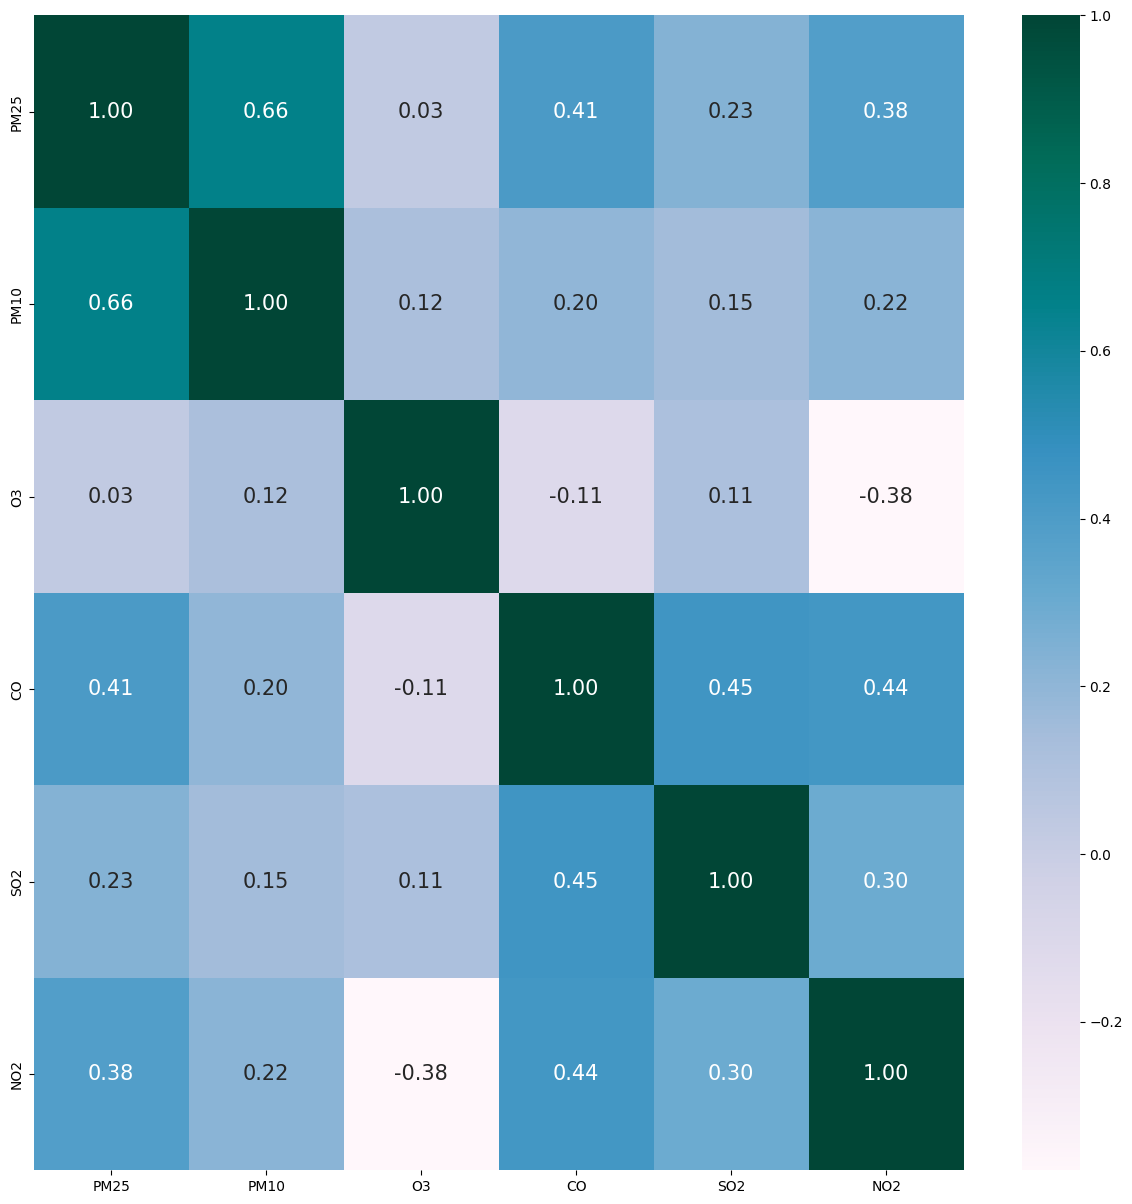

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(15,15))
sns.heatmap(df2_filtered.corr(numeric_only=True),
            annot=True,
            fmt=".2f",
            annot_kws={'size':15},
            cmap='PuBuGn',
            cbar = True,)

In [68]:
# 직접 상관계수 계산후 heatmap 그리기
import altair as alt

In [69]:
#관계도 계산
source_corr = df2_filtered.corr(numeric_only=True).reset_index().melt(id_vars='index')

In [70]:
source_corr

,index,variable,value
0,PM25,PM25,1.000000
1,PM10,PM25,0.656077
2,O3,PM25,0.026414
3,CO,PM25,0.408874
4,SO2,PM25,0.233612
5,NO2,PM25,0.382586
6,PM25,PM10,0.656077
7,PM10,PM10,1.000000
8,O3,PM10,0.122280
9,CO,PM10,0.197557


In [71]:
#heatmap 그리기
sort = {'PM25':0, 'PM10': 1, 'O3':2, 'CO': 3, 'SO2': 4, 'NO2':5}

heatmap = alt.Chart(source_corr)\
.mark_rect()\
.transform_calculate(
    order_rows='%s [datum.index]' % sort,
    order_cols='%s [datum.variable]' % sort
)\
.encode(
    alt.X('index:N', title=None, sort=list(sort.keys())),
    alt.Y('variable:N', title=None, sort=list(sort.keys())),
    alt.Color('value:Q', legend=None, scale=alt.Scale(scheme='purplered')),
    #alt.Legend()
)\
.properties(width=700, height=700
)

#heatmap 글자 설정
text = heatmap\
.mark_text(size=14)\
.encode(
    alt.Text('value:Q', format='.4f'),
    color=alt.condition(
        'datum.value > 0.5',
        alt.value('white'),
        alt.value('black'),
    )
)

heatmap + text

alt.LayerChart(...)

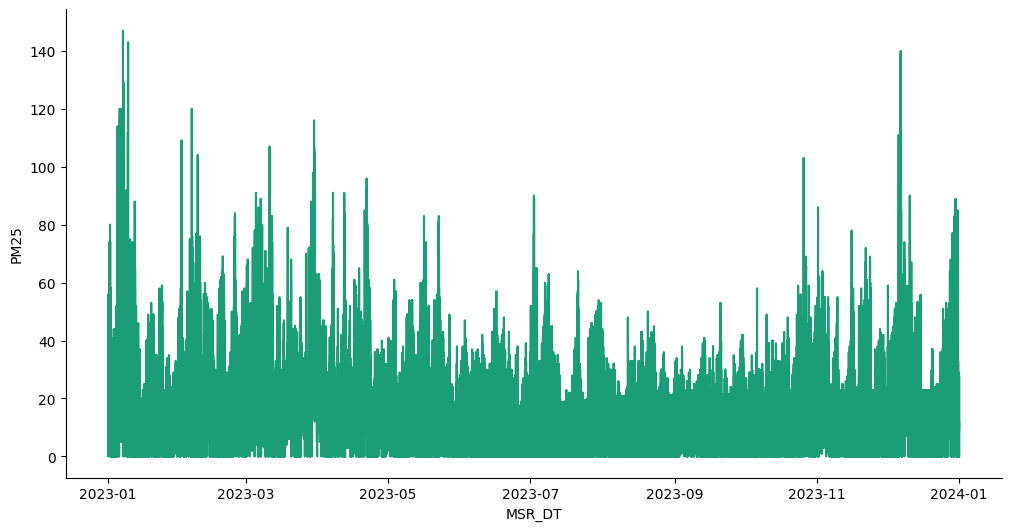

In [72]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MSR_DT']
  ys = series['PM25']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('MSR_DT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSR_DT')
_ = plt.ylabel('PM25')

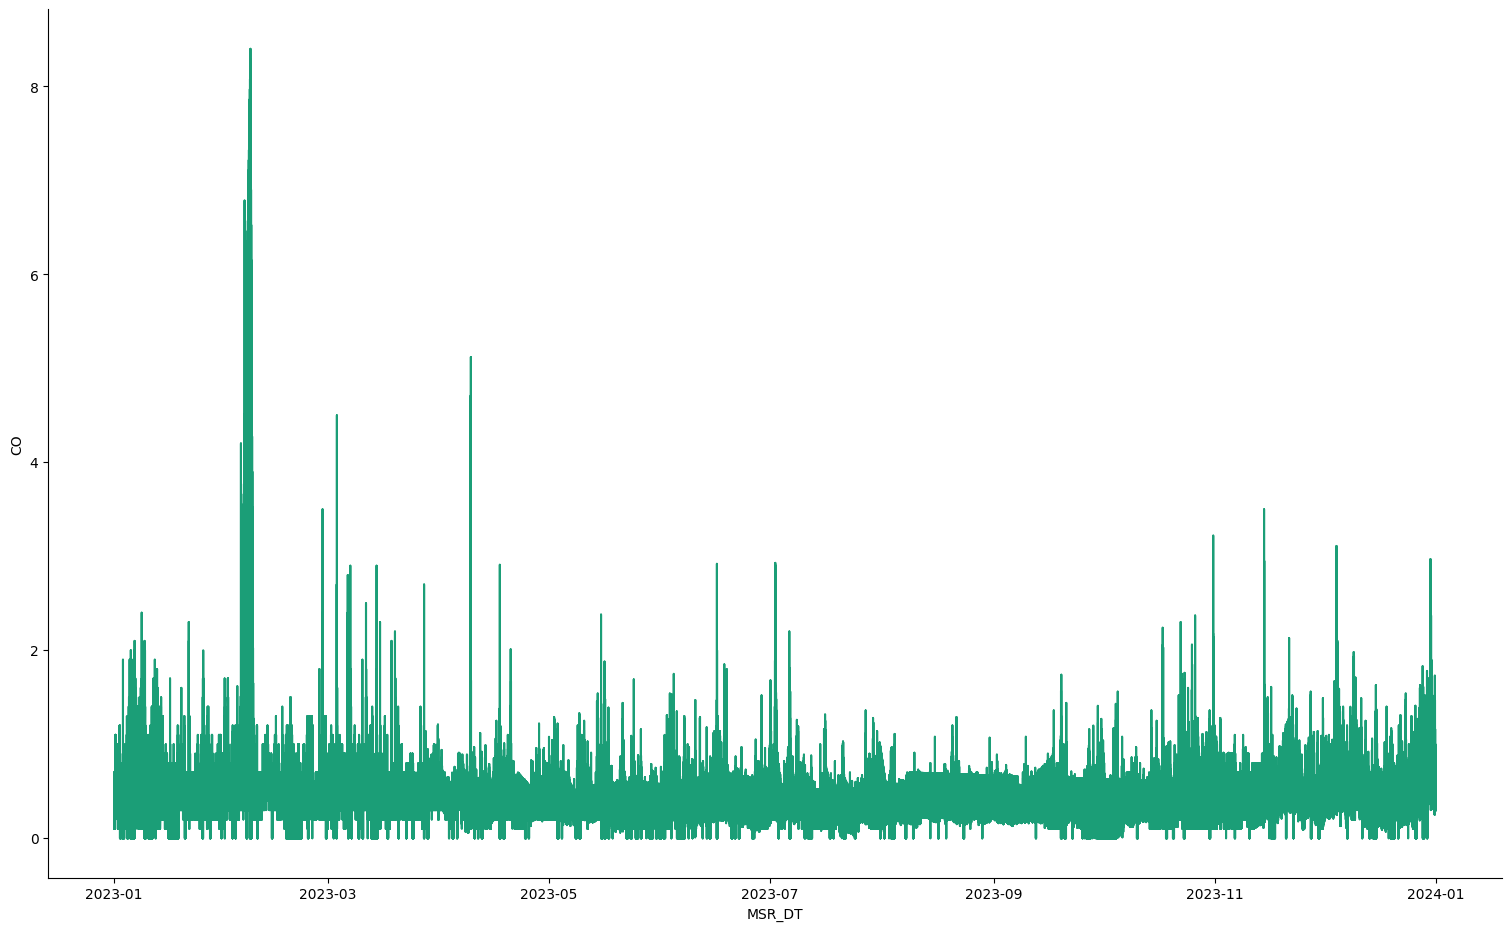

In [73]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MSR_DT']
  ys = series['CO']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(15, 9.2), layout='constrained')
df_sorted = df2.sort_values('MSR_DT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSR_DT')
_ = plt.ylabel('CO')

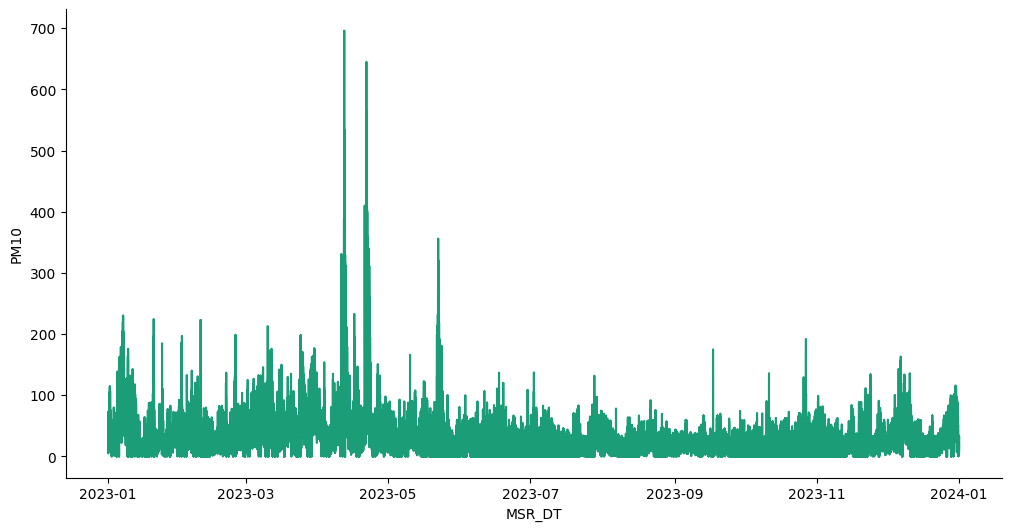

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MSR_DT']
  ys = series['PM10']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('MSR_DT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSR_DT')
_ = plt.ylabel('PM10')

I talked the supervisor about 이동차 and it has to be deleted.

In [75]:
Removeindex = df2[df2["STTN_NM"] == "이동차"].index
df2.drop(Removeindex, inplace=True)
print(df2)

                    MSR_DT STTN_NM  PM25  PM10     O3   CO    SO2    NO2
0      2023-01-01 01:00:00     명서동  18.0  24.0  0.027  0.4  0.003  0.018
1      2023-01-01 02:00:00     명서동  17.0  23.0  0.025  0.4  0.003  0.019
2      2023-01-01 03:00:00     명서동  18.0  23.0  0.014  0.5  0.003  0.029
3      2023-01-01 04:00:00     명서동  20.0  25.0  0.015  0.5  0.003  0.026
4      2023-01-01 05:00:00     명서동  19.0  24.0  0.010  0.5  0.003  0.032
...                    ...     ...   ...   ...    ...  ...    ...    ...
384540 2023-12-31 20:00:00     마산항   0.0  11.0  0.037  0.4  0.001  0.013
384541 2023-12-31 21:00:00     마산항  15.0  15.0  0.036  0.4  0.001  0.012
384542 2023-12-31 22:00:00     마산항   0.0  14.0  0.035  0.4  0.001  0.012
384543 2023-12-31 23:00:00     마산항   0.0  11.0  0.032  0.4  0.001  0.014
384544 2023-12-31 00:00:00     마산항   0.0  16.0  0.031  0.4  0.001  0.013

[379630 rows x 8 columns]


In [76]:
df2['STTN_NM'].unique()

array(['명서동', '용지동', '사파동', '성주동', '웅남동', '월영동', '봉암동', '회원동', '내서읍',
       '경화동', '상봉동', '대안동', '상대동', '정촌면', '무전동', '사천읍', '향촌동', '삼방동',
       '동상동', '장유동', '진례면', '진영읍', '내일동', '고현동', '아주동', '물금읍', '북부동',
       '삼호동', '의령읍', '가야읍', '창녕읍', '고성읍', '남해읍', '하동읍', '금성면', '산청읍',
       '함양읍', '거창읍', '합천읍', '삼진로', '김해대로', '남상면', '대산면', '저구리', '마산항'],
      dtype=object)

이동차 제거 완료! 지역별 그래프 샘플 만들기. 삼방동으로 해봅시다~

In [77]:
# import altair with an abbreviated alias
import altair as alt

# load a sample dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

# make the chart
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

alt.Chart(...)

In [78]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Horsepower', 'Acceleration', 'Miles_per_Gallon'],
    column=['Miles_per_Gallon', 'Acceleration', 'Horsepower']
).interactive()

alt.RepeatChart(...)

In [79]:
import altair as alt
import pandas as pd
import numpy as np

np.random.seed(1)

source = pd.DataFrame({
    'x': np.arange(100),
    'A': np.random.randn(100).cumsum(),
    'B': np.random.randn(100).cumsum(),
    'C': np.random.randn(100).cumsum(),
})

base = alt.Chart(source).mark_circle(opacity=0.5).transform_fold(
    fold=['A', 'B', 'C'],
    as_=['category', 'y']
).encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    alt.Color('category:N')
)

base + base.transform_loess('x', 'y', groupby=['category']).mark_line(size=4)

alt.LayerChart(...)

/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_45490/311721040.py:26: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  plt.tight_layout()
/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_45490/311721040.py:26: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  plt.tight_layout()
/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_45490/311721040.py:26: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtoo

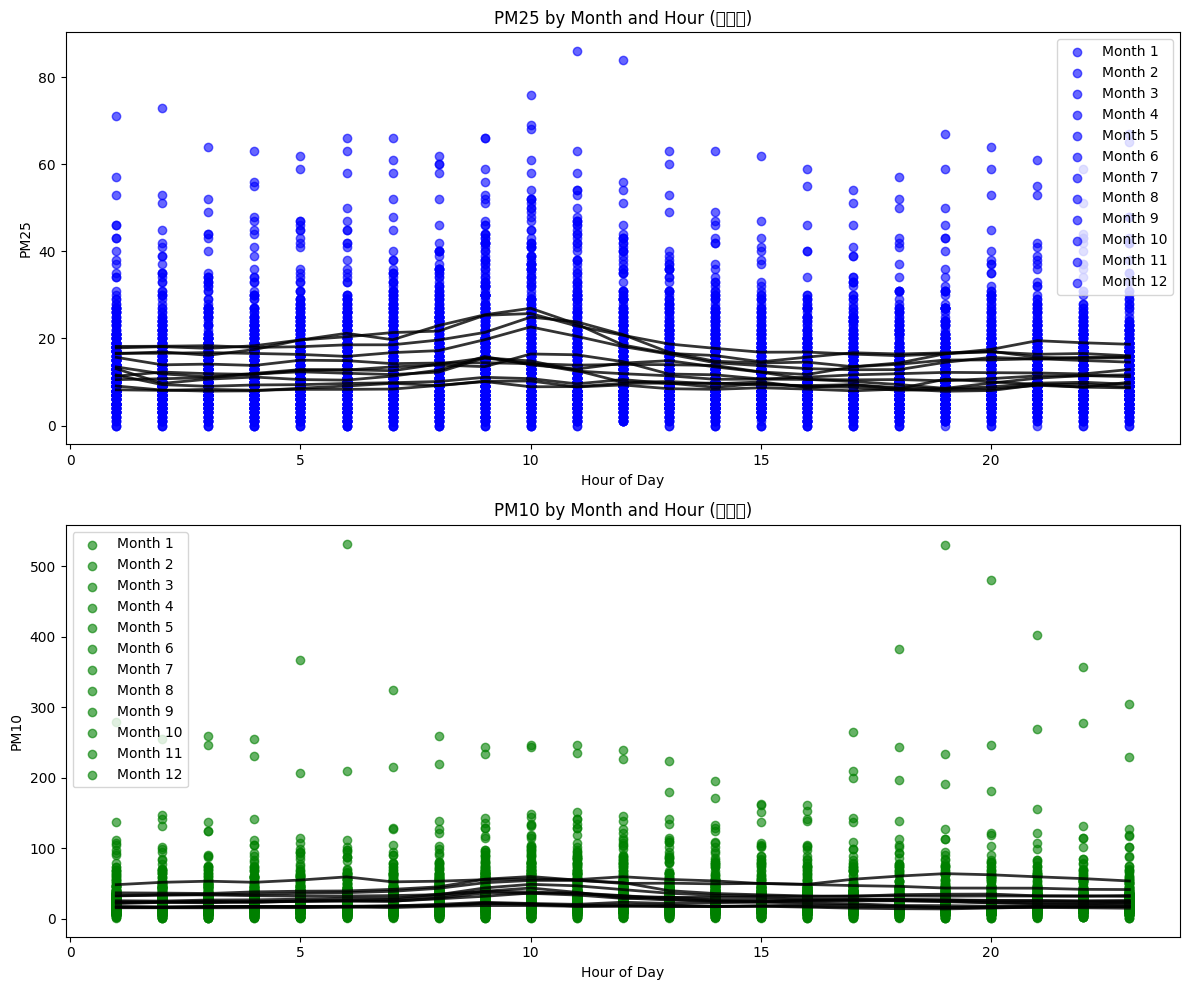

In [80]:
import pandas as pd
import matplotlib.pyplot as plt


# 월별 데이터 추출 (MSR_DT 열에서 월 추출)
df['Month'] = df2['MSR_DT'].dt.month

# 삼방동 데이터만 필터링
df_sambang = df[df['STTN_NM'] == '삼방동']

# 그래프 그리기 (시간대별 PM2.5, PM10 데이터)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

for i, (pollutant, color) in enumerate([('PM25', 'blue'), ('PM10', 'green')]):
    ax = axes[i]
    ax.set_title(f'{pollutant} by Month and Hour (삼방동)')
    for month in range(1, 13):
        month_data = df_sambang[df_sambang['Month'] == month]
        ax.scatter(month_data['MSR_DT'].dt.hour, month_data[pollutant], label=f'Month {month}', color=color, alpha=0.6)
        trend_line = month_data.groupby(month_data['MSR_DT'].dt.hour)[pollutant].mean()
        ax.plot(trend_line.index, trend_line.values, color='black', linestyle='-', linewidth=2, alpha=0.8)
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel(pollutant)
    ax.legend()

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

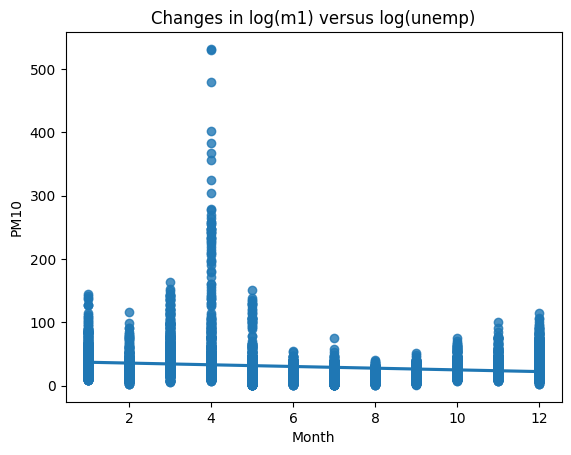

In [81]:
plt.figure()

df['Month'] = df['MSR_DT'].dt.month

# 삼방동 데이터만 필터링
df_sambang = df[df['STTN_NM'] == '삼방동']

ax = sns.regplot(x="Month", y="PM10", data=df_sambang)
ax.set_title("Changes in log(m1) versus log(unemp)")

In [87]:
import altair as alt
import pandas as pd
import numpy as np

df_sambang = df[df['STTN_NM'] == '삼방동']
data = df_sambang
df_sambang = pd.DataFrame(data)

# 'MSR_DT' 열을 datetime 형식으로 변환
df_sambang['MSR_DT'] = pd.to_datetime(df_sambang['MSR_DT'])

# 시간 정보를 새로운 열에 저장 (시간대를 나타내기 위해)
df_sambang['Hour'] = df_sambang['MSR_DT'].dt.hour

# 데이터 샘플링 (Altair의 데이터 크기 문제 해결을 위해)
df_sampled = df_sambang.sample(n=1000, random_state=42)

# 데이터프레임을 CSV 파일로 저장
df_sampled.to_csv('df_sambang_sampled.csv', index=False)

# 저장된 CSV 파일을 Altair의 데이터 소스로 사용
df_sampled = pd.read_csv('df_sambang_sampled.csv')

# 기본 Altair Chart 설정, 산점도 생성
base = alt.Chart(df_sampled).mark_circle(opacity=0.5).transform_fold(
    # fold 변환: 시각화할 열을 'category'와 'y'로 변환
    fold=['PM25', 'PM10', 'CO'],
    as_=['category', 'y']
).encode(
    # X축 설정: 시간대 (Hour)를 정량형으로 인코딩
    alt.X('Hour:Q', title='Hour of Day'),
    # Y축 설정: 변환된 'y' 값을 정량형으로 인코딩
    alt.Y('y:Q', title='Concentration'),
    # 색상 설정: 'category'를 명목형으로 인코딩하여 색상을 다르게 설정
    alt.Color('category:N', title='Pollutant')
)

# 기본 산점도에 LOESS 트렌드 라인 추가
trend_line = base.transform_loess(
    # LOESS 변환: x와 y의 값을 사용하여 스무딩된 트렌드 라인을 만듬
    'Hour', 'y', groupby=['category']
).mark_line(
    # 트렌드 라인의 스타일 설정: 크기 조정
    size=4
)

# 기본 산점도와 트렌드 라인을 결합하여 시각화
chart = base + trend_line

# Altair 차트 보여주기
chart.show()


RuntimeError: Internal: _stream is not defined.

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

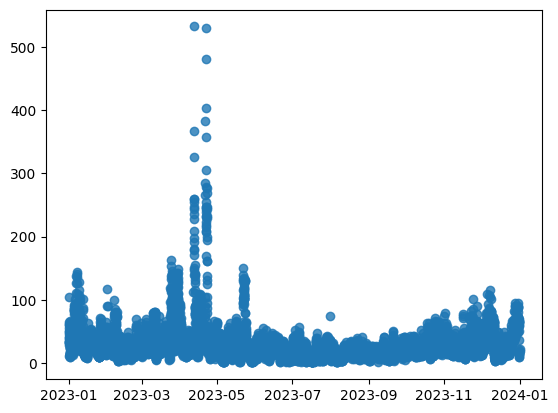

In [91]:
plt.figure()

df_sambang = df2[df2['STTN_NM'] == '삼방동']



ax = sns.regplot(x="MSR_DT", y="PM10", data=df_sambang)
ax.set_title("test")

Text(0.5, 1.0, 'test')

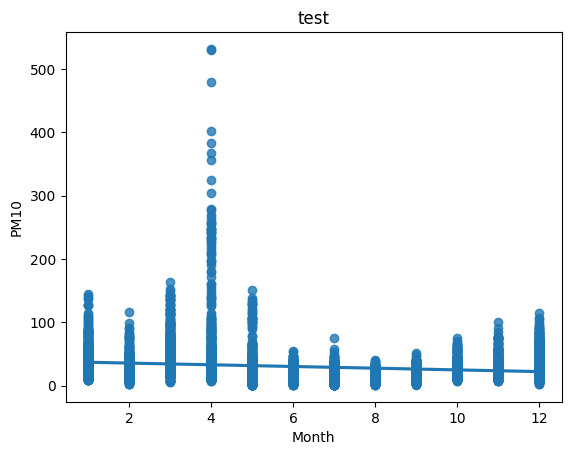

In [92]:
plt.figure()
df['Month'] = df['MSR_DT'].dt.month

df_sambang = df[df['STTN_NM'] == '삼방동']



ax = sns.regplot(x="Month", y="PM10", data=df_sambang)
ax.set_title("test")

In [94]:
df['Month'] = df['MSR_DT'].dt.month
df_sambang = df[df['STTN_NM'] == '삼방동']

line_chart = alt.Chart(df_sambang).mark_line().encode(
    x=alt.X('Month:O', title='Month'),
    y=alt.Y('average(PM10):Q', title='Average PM10 Concentration')
).properties(
    title='Average PM10 Concentration Over Time'
)

line_chart.show()


RuntimeError: Internal: _stream is not defined.

if I keep doing this way, it doesn't really look like useful cause it's too big, densed graph. so what about making new data which is about calculating "mean". 지금 데이터 수가 너무 많은데 그걸 다 표현하려고 하니까 오류가 나는 거잖아. 데이터에 대해서 월별 평균만을 구해서 새로 데이터 프레임을 만들고, 그걸로만 그래프를 그리려고 해.

In [101]:
import altair as alt
import pandas as pd
import numpy as np


# 'MSR_DT' 열을 datetime 형식으로 변환
df_sambang['MSR_DT'] = pd.to_datetime(df_sambang['MSR_DT'])

# 월별 열이 존재하는 경우 제거
if 'Month' in df_sambang.columns:
    df_sambang = df_sambang.drop(columns=['Month'])

# 월별 열 추가
df_sambang['Month'] = df_sambang['MSR_DT'].dt.month

# 수치형 열만 선택
numeric_columns = df_sambang.select_dtypes(include=[np.number]).columns

# 월별 평균 계산
monthly_avg = df_sambang.groupby('Month')[numeric_columns].mean().reset_index()

# 라인 차트 생성
line_chart = alt.Chart(monthly_avg).mark_line().encode(
    x=alt.X('Month:O', title='Month'),
    y=alt.Y('PM10:Q', title='Average PM10 Concentration')
).properties(
    title='Average PM10 Concentration Over Time'
)

# 라인 차트 출력
line_chart.show()

# 상자 그림 생성
boxplot = alt.Chart(df_sambang).mark_boxplot().encode(
    x=alt.X('Month:O', title='Month'),
    y=alt.Y('PM10:Q', title='PM10 Concentration')
).properties(
    title='PM10 Concentration Box Plot'
)

# 상자 그림 출력
boxplot.show()

# 히트맵 생성
heatmap = alt.Chart(df_sambang).mark_rect().encode(
    x=alt.X('Month:O', title='Month'),
    y=alt.Y('PM10:Q', bin=True, title='PM10 Concentration'),
    color='count()'
).properties(
    title='PM10 Concentration Heatmap'
)

# 히트맵 출력
heatmap.show()


ValueError: cannot insert month, already exists

In [102]:
df_sambangdong

,MSR_DT,STTN_NM,PM25,PM10,O3,CO,SO2,NO2,Month
148829,2023-01-01 01:00:00,삼방동,21.0,29.0,0.0270,0.30,0.0030,0.0080,1.0
148830,2023-01-01 02:00:00,삼방동,22.0,34.0,0.0270,0.30,0.0030,0.0080,1.0
148831,2023-01-01 03:00:00,삼방동,26.0,31.0,0.0270,0.30,0.0030,0.0070,1.0
148832,2023-01-01 04:00:00,삼방동,24.0,33.0,0.0250,0.30,0.0030,0.0110,1.0
148833,2023-01-01 05:00:00,삼방동,24.0,34.0,0.0250,0.30,0.0030,0.0110,1.0
...,...,...,...,...,...,...,...,...,...
157584,2023-12-31 20:00:00,삼방동,8.0,15.0,0.0384,0.45,0.0018,0.0107,12.0
157585,2023-12-31 21:00:00,삼방동,8.0,17.0,0.0376,0.44,0.0018,0.0103,12.0
157586,2023-12-31 22:00:00,삼방동,13.0,19.0,0.0325,0.45,0.0019,0.0125,12.0
157587,2023-12-31 23:00:00,삼방동,10.0,23.0,0.0296,0.46,0.0017,0.0131,12.0


In [111]:
del df_sambang['Month']


KeyError: 'Month'

In [113]:
df_sambang.drop(columns=['Month'], inplace=True)


KeyError: "['Month'] not found in axis"

In [114]:
import altair as alt
import pandas as pd
import numpy as np


# 'MSR_DT' 열을 datetime 형식으로 변환
df_sambang['MSR_DT'] = pd.to_datetime(df_sambang['MSR_DT'])

# 'Month' 열이 존재하는지 확인
print("Before dropping 'Month' column:", df_sambang.columns)

# 'Month' 열이 존재하는 경우 제거
if 'Month' in df_sambang.columns:
    df_sambang.drop(columns=['Month'], inplace=True)

# 확인용 출력
print("After dropping 'Month' column:", df_sambang.columns)

# 'Month' 열 추가
df_sambang['Month'] = df_sambang['MSR_DT'].dt.month

# 확인용 출력
print("After adding 'Month' column:", df_sambang.columns)

# 수치형 열만 선택
numeric_columns = df_sambang.select_dtypes(include=[np.number]).columns

# 월별 평균 계산
monthly_avg = df_sambang.groupby('Month')[numeric_columns].mean().reset_index()

# 확인용 출력
print("Monthly average data:\n", monthly_avg)

# 라인 차트 생성
line_chart = alt.Chart(monthly_avg).mark_line().encode(
    x=alt.X('Month:O', title='Month'),
    y=alt.Y('PM10:Q', title='Average PM10 Concentration')
).properties(
    title='Average PM10 Concentration Over Time'
)

# 라인 차트 출력
line_chart.show()

# 상자 그림 생성
boxplot = alt.Chart(df_sambang).mark_boxplot().encode(
    x=alt.X('Month:O', title='Month'),
    y=alt.Y('PM10:Q', title='PM10 Concentration')
).properties(
    title='PM10 Concentration Box Plot'
)

# 상자 그림 출력
boxplot.show()

# 히트맵 생성
heatmap = alt.Chart(df_sambang).mark_rect().encode(
    x=alt.X('Month:O', title='Month'),
    y=alt.Y('PM10:Q', bin=True, title='PM10 Concentration'),
    color='count()'
).properties(
    title='PM10 Concentration Heatmap'
)

# 히트맵 출력
heatmap.show()


Before dropping 'Month' column: Index(['MSR_DT', 'STTN_NM', 'PM25', 'PM10', 'O3', 'CO', 'SO2', 'NO2', 'month'], dtype='object')
After dropping 'Month' column: Index(['MSR_DT', 'STTN_NM', 'PM25', 'PM10', 'O3', 'CO', 'SO2', 'NO2', 'month'], dtype='object')
After adding 'Month' column: Index(['MSR_DT', 'STTN_NM', 'PM25', 'PM10', 'O3', 'CO', 'SO2', 'NO2', 'month',
       'Month'],
      dtype='object')


ValueError: cannot insert Month, already exists

In [117]:
df_sambang = df2[df2['STTN_NM'] == '삼방동']
# 'Month' 열 추가
df_sambang['Month'] = df_sambang['MSR_DT'].dt.month
# 월별 평균 계산
monthly_avg = df_sambang.groupby('Month')[numeric_columns].mean().reset_index()

# 확인용 출력
print("Monthly average data:\n", monthly_avg)



/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_45490/3370792317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sambang['Month'] = df_sambang['MSR_DT'].dt.month


KeyError: "Columns not found: 'month'"

In [128]:
# datetime type 데이터에서 년, 월, 시간 분리
df['Year'] = df['MSR_DT'].dt.year
df['Month'] = df['MSR_DT'].dt.month
df['Hour'] = df['MSR_DT'].dt.hour

In [122]:
df['Year'].unique()

array([2023.,   nan])

In [123]:
# 월 종류 확인
df['Month'].unique()

array([ 1., nan,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [129]:
# 시간 종류 확인 
df['Hour'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., nan])

In [136]:
def graph(feature,data=df):
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.boxplot(x=feature,data=df)
    plt.subplot(1,2,2)
    sns.histplot(x=feature,data=df,kde=True)
    plt.tight_layout()
    plt.show()

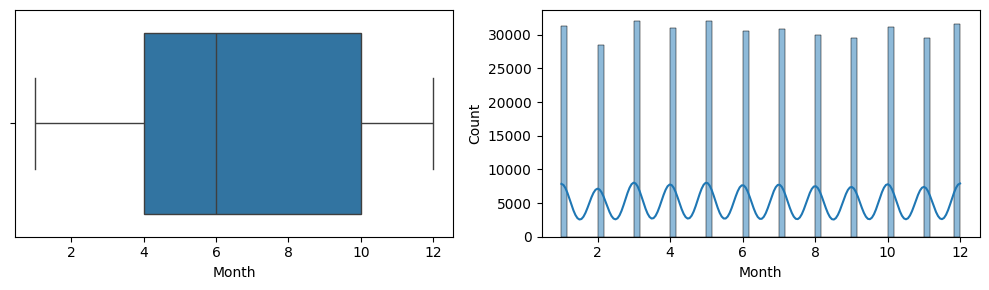

In [137]:
graph('Month')

In [133]:
# target,feature 상관관계 분석
def graph2(feature,target='Sales',data=df):
    plt.figure(figsize=(10,3))
    sns.scatterplot(x=Month,y=feature,data=df)
    plt.tight_layout()
    plt.show()

In [135]:
graph2('Hour')

ValueError: Could not interpret value `Sales` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x300 with 0 Axes>

1. 전체 3년치 데이터 전부 전처리해서 새 전체 데이터셋 만든다
2. 그걸 다시 지역별로 나눠서 df_sambangdong ... 만든다
3. 각 지역별로 년, 월, 시간대별로 그래프 그리고 상관분석 한다
4. 전체 지역 지도 위에 한눈에 볼 수 있게 분석한다
5. 데이터셋들을 갖고 지역별, 전체 인공지능 모델 예측한다


숙제
1. 보고서의 목차 만들어오기 : 장제목 절제목 결론 → 선행연구 베껴와서 말만 바꾸기 
2. 한 지역에 대한 그래프 샘플 - 9개 상관분석 마지막에 지도 지역별 한 슬라이드로

In [ ]:
# Mean by Hour